In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

In [5]:
print('Загрузка данных...')
X = []
Y = []
with open('ex1data3.csv') as f:
    scv_reader = csv.reader(f, delimiter=',')
    for row in scv_reader:
        X.append([row[0], row[1]])
        Y.append([row[2]])
X = np.asarray(X).astype(np.float)
Y = np.asarray(Y).astype(np.float)
m = Y.size

Загрузка данных...


In [6]:
# Задача 1 - Нормализация признаков
print('Нормализация признаков...')
X, mu, sigma = ut.featureNormalize(X)
ones_column = np.ones((m, 1))
X = np.hstack((ones_column, X))

Нормализация признаков...


Выполнение градиентного спуска...


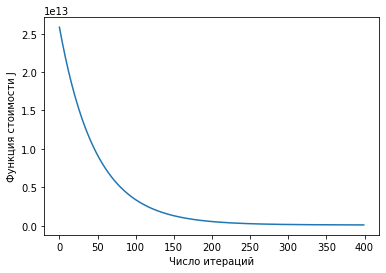

In [7]:
# Задача 2 - Метод градиентного спуска
print('Выполнение градиентного спуска...')
alpha = 0.01
num_iters = 400

theta = np.zeros((3, 1))
theta, J_history = ut.gradient_descent(X, Y, theta, alpha, num_iters)

fig = plt.figure()
ax = plt.axes()
plt.plot(np.arange(J_history.size), J_history)
ax.set_xlabel("Число итераций")
ax.set_ylabel("Функция стоимости J")
plt.show()

In [8]:
print("theta, полученное методом градиентного спуска:", theta)
# Оценка стоимости 3-комантной квартиры площадью 60 м2
in_x = np.array([1, 60, 3])
norm_mu = np.array([0, mu[0, 0], mu[0, 1]])
norm_sigma = np.array([1, sigma[0, 0], sigma[0, 1]])
norm_in_x = np.subtract(in_x, norm_mu)/norm_sigma
print("norm_in_x:", norm_in_x)
price = theta.reshape(1, 3)@norm_in_x.reshape(3, 1)
print("Стоимость трехкомнатной квартиры площадью 60 м2 составляет:", price)

theta, полученное методом градиентного спуска: [[6899917.02309388]
 [1116546.73215195]
 [ 695699.70107719]]
norm_in_x: [ 1.         -0.28567259  0.        ]
Стоимость трехкомнатной квартиры площадью 60 м2 составляет: [[6580950.22805141]]


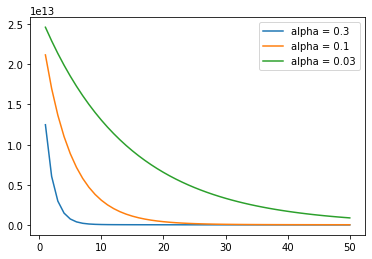

In [10]:
# Выбор скорости обучения
fig = plt.figure()
alpha = 0.3
num_iters = 50
theta = np.zeros((3, 1))
theta, J_1 = ut.gradient_descent(X, Y, theta, alpha, num_iters)
plt.plot(np.arange(1, 51), J_1)
alpha /= 3
theta = np.zeros((3, 1))
theta, J_2 = ut.gradient_descent(X, Y, theta, alpha, num_iters)
plt.plot(np.arange(1, 51), J_2)
alpha /= 3
theta = np.zeros((3, 1))
theta, J_3 = ut.gradient_descent(X, Y, theta, alpha, num_iters)
plt.plot(np.arange(1, 51), J_3)
ax = fig.axes[0]
ax.legend(['alpha = 0.3', 'alpha = 0.1', 'alpha = 0.03'])
plt.show()

In [11]:
print("Решение системы нормальных уравнений...")
# Загрузка данных
X = []
Y = []
with open('ex1data3.csv') as f:
    scv_reader = csv.reader(f, delimiter=',')
    for row in scv_reader:
        X.append([row[0], row[1]])
        Y.append([row[2]])
X = np.asarray(X).astype(np.float)
Y = np.asarray(Y).astype(np.float)
m = Y.size

# Задача 1 - Нормализация признаков
ones_column = np.ones((m, 1))
X = np.hstack((ones_column, X))

# Расчет theta решением системы нормальных уравнений
theta = ut.normalEqn(X, Y)
print("Значение theta, полученное методом решения системы нормальных уравнений:", theta)

in_x_new = np.array([1, 60, 3]).reshape(3, 1)
price = theta.T@in_x_new
print("Стоимость трехкомнатной квартиры площадью 60 м2 составляет:", price)

Решение системы нормальных уравнений...
Значение theta, полученное методом решения системы нормальных уравнений: [[-1222144.91038483]
 [  128996.20745004]
 [   -3439.55623461]]
Стоимость трехкомнатной квартиры площадью 60 м2 составляет: [[6507308.86791352]]
